---
## Instructions

Welcome to CS 178!

This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to modify these starter Jupyter notebooks to complete your assignment and to write your report. You may add additional cells (containing either code or text) as needed. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing __*print preview* and *printing to pdf*__). Before submitting the pdf, ensure that all text and code is legible (i.e. not cut off) and includes page breaks (i.e. not one very long page). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

If you have any questions/concerns about using Jupyter notebooks, ask us on Piazza. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Exploring the Iris Dataset (30 points)
    - Problem 1.1: Numpy Arrays (5 points)
    - Problem 1.2: Feature Statistics (5 points)
    - Problem 1.3: Histograms (5 points)
    - Problem 1.4: Scatter Plots (10 points)
    - Problem 1.5: Vectorization Comparison (5 points)
- Problem 2: Linear Regression (35 points)
    - Problem 2.1: Visualize Regression Predictions (5 points)
    - Problem 2.2: Loss Function (10 points)
    - Problem 2.3: Compute Gradient of MSE (10 points)
    - Problem 2.4: Gradient Descent Algorithm (10 points)
- Problem 3: Model Selection (30 points)
    - Problem 3.1: Transform Input Features (5 points)
    - Problem 3.2: Fit and Visualize Polynomial Regression (10 points)
    - Problem 3.3: Polynomial Degree Selection (15 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assigment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

In [3]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

---
## Problem 1: Exploring the Iris Dataset

In this problem, you will explore some basic data manipulation and visualizations with the Iris dataset. For every datapoint, we are given several real-valued features which will be used to predict what species of Iris a given flower is. Let's first load in the dataset by running the code cell below:

In [4]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
# Load the features and labels in the Iris dataset
iris_X, iris_y = load_iris(return_X_y=True)

### Problem 1.1 (5 points): Numpy Arrays

The variable `iris_X` is a numpy array containing the feature vectors in our dataset, and `iris_y` is a numpy array containing the corresponding labels.

- What is the shape of `iris_X` and `iris_y`? ([Hint](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html))
- How many datapoints are in our dataset, and how many features does each datapoint have?
- How many different classes (i.e. labels) are there?
- Print rows 3, 4, 5, and 6 of the feature matrix and their corresponding labels. Since Python is zero-indexed, we will count our rows starting at zero -- for example, by \"row 0\" we mean `iris_X[0, :]`, and \"row 1\" means `iris_X[1, :]`, etc. (Hint: you can do this in two lines of code with slicing).


### Test Code

In [5]:
print(f"The shape of iris_X is: {iris_X.shape}")
print(f"The shape of iris_Y is: {iris_y.shape}")
print(f"There are {len(np.unique(iris_y))} different classes")

The shape of iris_X is: (150, 4)
The shape of iris_Y is: (150,)
There are 3 different classes


### Answer

- The shape of iris_X is: (150, 4)
  The shape of iris_Y is: (150,)

- There are 150 rows so there are 150 datapoints and there are 4 columns so there are 4 features for each datapoints.

- There are 3 different classes.

In [6]:
print(iris_X[3:7])
print(iris_y[3:7])

[[4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
[0 0 0 0]


### Problem 1.2 (5 points): Feature Statistics

Let's compute some statistics about our features. You are allowed to use `numpy` to help you with this problem -- for example, you might find some of the `numpy` functions listed [here](https://numpy.org/doc/stable/reference/routines.statistics.html) or [here](https://numpy.org/doc/stable/reference/routines.math.html) useful.

- Compute the mean and standard deviation of each feature.
- Compute the minimum and maximum value for each feature.

Make sure to print out each of these values, and indicate clearly which value corresponds to which computation.

Hint: Numpy has functions that will help you with this.

In [7]:
print(f"The mean of each feature is : {np.mean(iris_X,axis=0)}")
print(f"The standard deviation of each feature is : {np.std(iris_X,axis=0)}")
print(f"The minimum of each feature is : {np.min(iris_X,axis=0)}")
print(f"The maximun of each feature is : {np.max(iris_X,axis=0)}")

The mean of each feature is : [5.84333333 3.05733333 3.758      1.19933333]
The standard deviation of each feature is : [0.82530129 0.43441097 1.75940407 0.75969263]
The minimum of each feature is : [4.3 2.  1.  0.1]
The maximun of each feature is : [7.9 4.4 6.9 2.5]


### Problem 1.3 (5 points):  Feature Histograms
- For every feature in `iris_X`, plot a histogram of the values of the feature.
- Include a title above each subplot to indicate which feature we are plotting.

Some starter code is provided for you below.

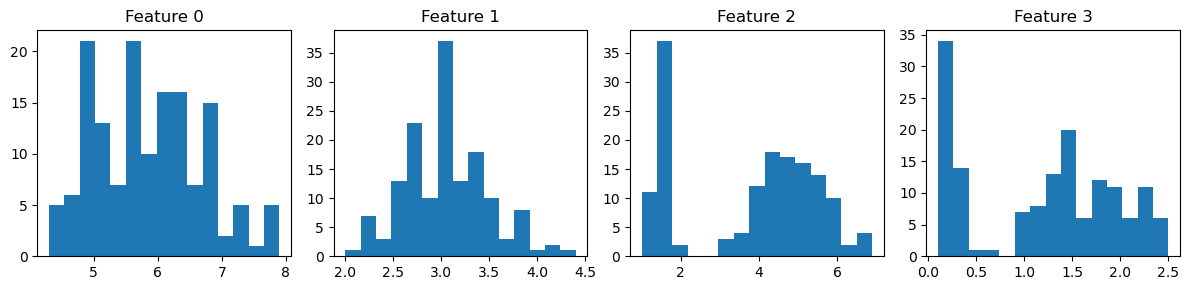

In [8]:
# Create a figure with 1 row and 4 columns
figure, axes = plt.subplots(1, 4, figsize=(12, 3))

### YOUR CODE STARTS HERE ###
# Plot a histogram for each feature
# Include a title on each subplot
for i in range(iris_X.shape[1]):
    axes[i].hist(iris_X[:,i], bins=15)
    axes[i].set_title(f'Feature {i}')
### YOUR CODE ENDS HERE  ###

plt.tight_layout()

### Problem 1.4 (10 points): Feature Scatter Plots
- For every pair of features in `iris_X`, plot a scatter plot of the feature values, colored according to their labels. For example, plot all data points with $y=0$ as blue, $y=1$ as green, etc.
- Include an x-label and a y-label on each subplot to indicate which features we are plotting.

For example, you can call the first feature "Feature 0", the second feature "Feature 1", etc. (Hint: `axes[0, 0].set_xlabel(...)` might help you with the first subplot.)

Some starter code is provided for you below.

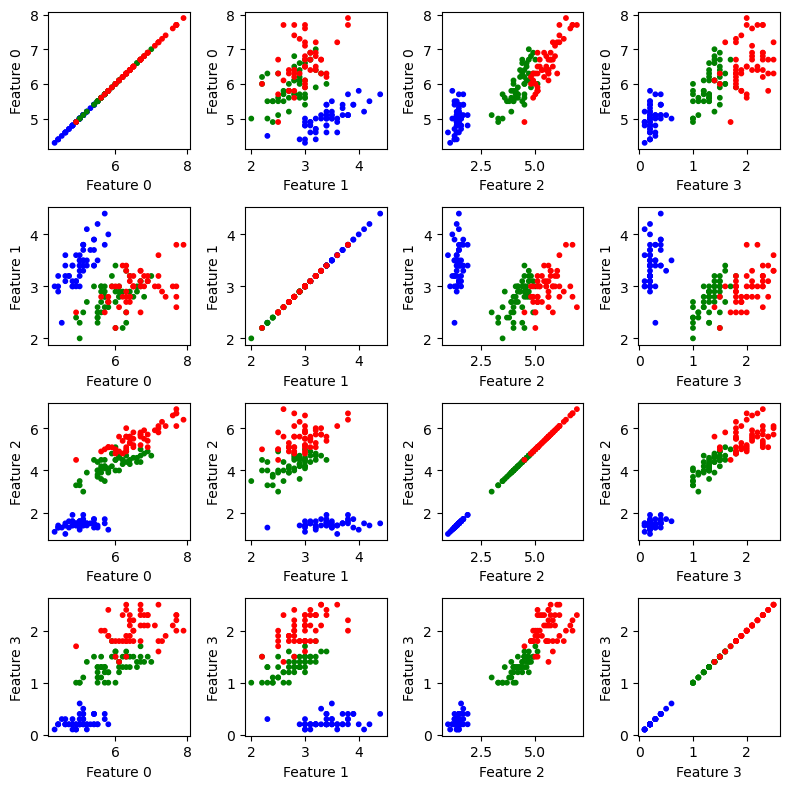

In [9]:
# Create a figure with 4 rows and 4 columns
figure, axes = plt.subplots(4, 4, figsize=(8, 8))

### YOUR CODE STARTS HERE ###
# Plot a scatter for each feature pair.
# Make sure to color the points by their class label.
# Include an x-label and a y-label for each subplot.

# create color array
colors = []
for k in range(iris_X.shape[0]):
    if iris_y[k]==0:
        colors.append("blue")
    elif iris_y[k]==1:
        colors.append("green")
    else:
        colors.append("red")
assert(len(colors)==iris_X.shape[0])
#scatter the feature pair
for i in range(iris_X.shape[1]):
    for j in range(iris_X.shape[1]):
        axes[i,j].scatter(iris_X[:,j], iris_X[:,i], c=colors, s=10)
        axes[i,j].set_xlabel(f'Feature {j}')
        axes[i,j].set_ylabel(f'Feature {i}')

### YOUR CODE ENDS HERE  ###

plt.tight_layout()

### Problem 1.5 (5 points): Vectorization Comparison

Part of the appeal of using `numpy` is that it allows for using _vectorized_ operations on your data. Instead of operating on a single value at a time, these allow for performing the same operation on multiple values simultaneously. This can have an immense impact on performance.

We will demonstrate this improvement by comparing a vectorized and non-vectorized implementation of calculating the variance of a given feature vector.
- Implement the function `variance_loops` to compute the variance of a 1D `numpy` array using loops and indexing into the array. No vectorized operations are allowed (in general, this means no `numpy` commands).
- Implement the function `variance_vector` to compute the variance of a 1D `numpy` array using only vectorized operations. No loops or indexing into the array is allowed. Additionally, while `numpy` has `np.var()` implemented, this is not allowed in your implementation. Using `np.mean()` or `np.sum()` is allowed though.

Note that `len()` is allowed in both implementations.

Recall that the formula for the sample variance of the set of values $x_1, x_2, \dots, x_n$ is:
$$\text{Var} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2 \text{ where } \bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$$

Run the cells after the implementation to see the impact that vectorization has. You should see at least a 10x reduction in runtime. When possible, you should always strive for vectorized operations as they will almost always be more efficient.

In [10]:
def variance_loops(x):
    '''x: 1D numpy array'''
    ### YOUR CODE STARTS HERE ###
    # Using only native python loops and indexing, calculate variance
    # No numpy commands, such as np.sum(), np.mean(), np.var()
    sum=0
    for i in x:
        sum += i
    mean= sum/len(x)
    stddeviation=0
    for i in x:
        stddeviation += (i-mean)**2
    var = stddeviation/(len(x)-1)
    ### YOUR CODE ENDS HERE ###
    return var

def variance_vector(x):
    '''x: 1D numpy array'''
    ### YOUR CODE STARTS HERE ###
    # Using only numpy commands, such as np.sum() or np.mean(), as well as vectorized operations,
    # calculate the variance of `x`.
    # No native python loops, indexing, or use of either np.var() or np.std().
    mean = np.mean(x)
    stddeviation = np.sum((x-mean)**2)
    var = stddeviation/(len(x)-1)
    ### YOUR CODE ENDS HERE ###
    return var

Run the following cell to ensure that your implementations for both functions matches the `numpy` implementation. If no exceptions are raised, then you've succeeded.

In [11]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
assert math.isclose(variance_loops(iris_X[:, 0]), iris_X[:, 0].var(ddof=1))
assert math.isclose(variance_vector(iris_X[:, 0]), iris_X[:, 0].var(ddof=1))

Run the following cells for timing comparisons when computing the variance of the values of Feature 0 in the Iris dataset:

In [12]:
%%timeit  # JUST RUN - DO NOT EDIT THIS CODE BLOCK
variance_loops(iris_X[:, 0])

75.5 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%%timeit  # JUST RUN - DO NOT EDIT THIS CODE BLOCK
variance_vector(iris_X[:, 0])

18.2 µs ± 527 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit  # JUST RUN - DO NOT EDIT THIS CODE BLOCK
iris_X[:, 0].var(ddof=1)  # numpy's implementation of variance

25.4 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---
## Problem 2: Linear Regression

In this problem, you will implement gradient descent to train a linear model (with a bias unit) on a 1D Dataset by using the mean square error as loss function. **This linear model can be written as $f(x|\theta) = \theta_0 + \theta_1 x$.**

Let's first load in the dataset by running the code cell below:

In [15]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
# Generate the inputs and outputs
def gen_data(n, seed=seed):
    rng = np.random.RandomState(seed)
    x = np.linspace(-0.95, 0.95, n)
    mean_y = (np.exp(3.75*x) - np.exp(-3.75*x) - 4.0)*0.1
    y = mean_y + rng.randn(n)*0.4
    return x, y

x, y = gen_data(30, seed=seed+1)
print("X Range: [{:.2f}, {:.2f}], Y Range: [{:.2f}, {:.2f}]".format(x.min(), x.max(), y.min(), y.max()))

X Range: [-0.95, 0.95], Y Range: [-3.65, 3.58]


In [16]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
def plot_data(x, y):
    # Make a figure with 1 subplot
    fig, axes = plt.subplots()

    axes.scatter(x, y)

    axes.set_xlabel('x', fontsize=14)
    axes.set_ylabel('y', fontsize=14)

    axes.set_xlim(-1.0,1.0)
    axes.set_ylim(-4,4)

    return fig, axes

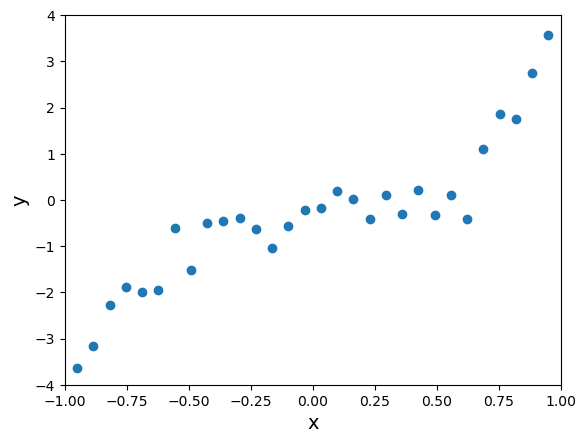

In [17]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
fig, axes = plot_data(x, y)

For this problem, we will focus on the properties of the gradient descent algorithm, rather than generalization
performance. Thus we will not create a separate validation dataset, and simply use all available data for training. We will revisit this idea in Problem 3.

### Problem 2.1 (5 points): Visualize regression predictions

In our code, the variable `x` is a numpy array containing the feature vector in this 1D dataset, and `y` is a numpy array containing the corresponding target values, which are continuous in the range of roughly $[-4, 4]$.

We have a linear model $f(x|\theta) = \theta_0 + \theta_1 x$.

- Create a function that, given feature vector `x`, target values `y` and parameters `theta_0`, `theta_1`, plots the data (`x` and `y`) and the predicted regression line that corresponds to the given parameters.

Keep in mind that the points **do not** affect the regression line yet, we are only plotting the line in order to visualize it alongside the points.

In [18]:
def plot_regression(x, y, theta_0, theta_1):
    '''
    x:       [# feature vectors], feature values
    y:       [# feature vectors], target values
    theta_0: the bias parameter of linear model
    theta_1: the slope parameter of linear model
    '''

    ### YOUR CODE STARTS HERE ###
    fig, axes = plot_data(x, y)
    predRegression = theta_0 + theta_1*x
    axes.plot(x,predRegression, 'r')
    ### YOUR CODE ENDS HERE

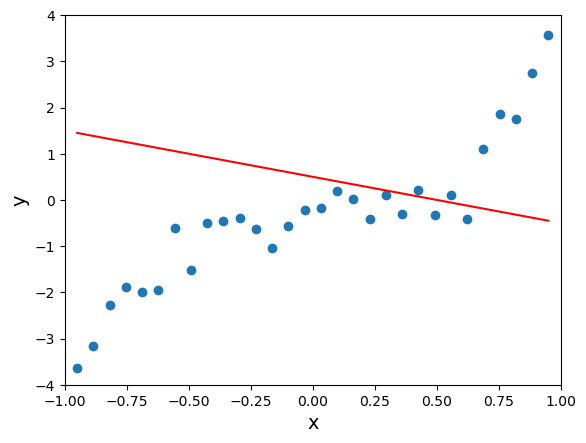

In [19]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
# Display the decision boundary of the linear model governed by the parameters below.
theta_0_random, theta_1_random = 0.5, -1

plot_regression(x, y, theta_0_random, theta_1_random)

### Problem 2.2 (10 points): Loss function

In this problem, we apply the mean squared error (MSE), **which is 1/n of the squared error**, as the loss function for gradient decent.

- Write out the mathematical equation of the function of the mean squared error $L(\theta_0, \theta_1)$. You can optionally use $\LaTeX$ in your answer on the jupyter notebook, otherwise, write it down on paper and take a picture or use any other mathematical typesetting tools you have available to you. In order to include an image in jupyter notebook, you save the image in the same directory as the .ipynb file and then write `![caption](image.png)`. The caption may be anything you want, it will only be shown as alt text when hovering over the image.
- Implement the function `MSE`.
- Report MSE of the linear model defined by `theta_0_random` and `theta_1_random`, across the dataset ($\textbf{x}$, $\textbf{y}$);
- Visualize the countour plot of MSE in $\theta$ space, from $\theta_0 \in [-2,2]$ and $\theta_1 \in [-1,3]$. (Hint: use `np.meshgrid` to create a grid of possible $(\theta_0, \theta_1)$ values. Use `ax.contour` to plot the values of $L$ in every value in the grid.)

In [20]:
from IPython.display import Image, display

Write definition of MSE here:

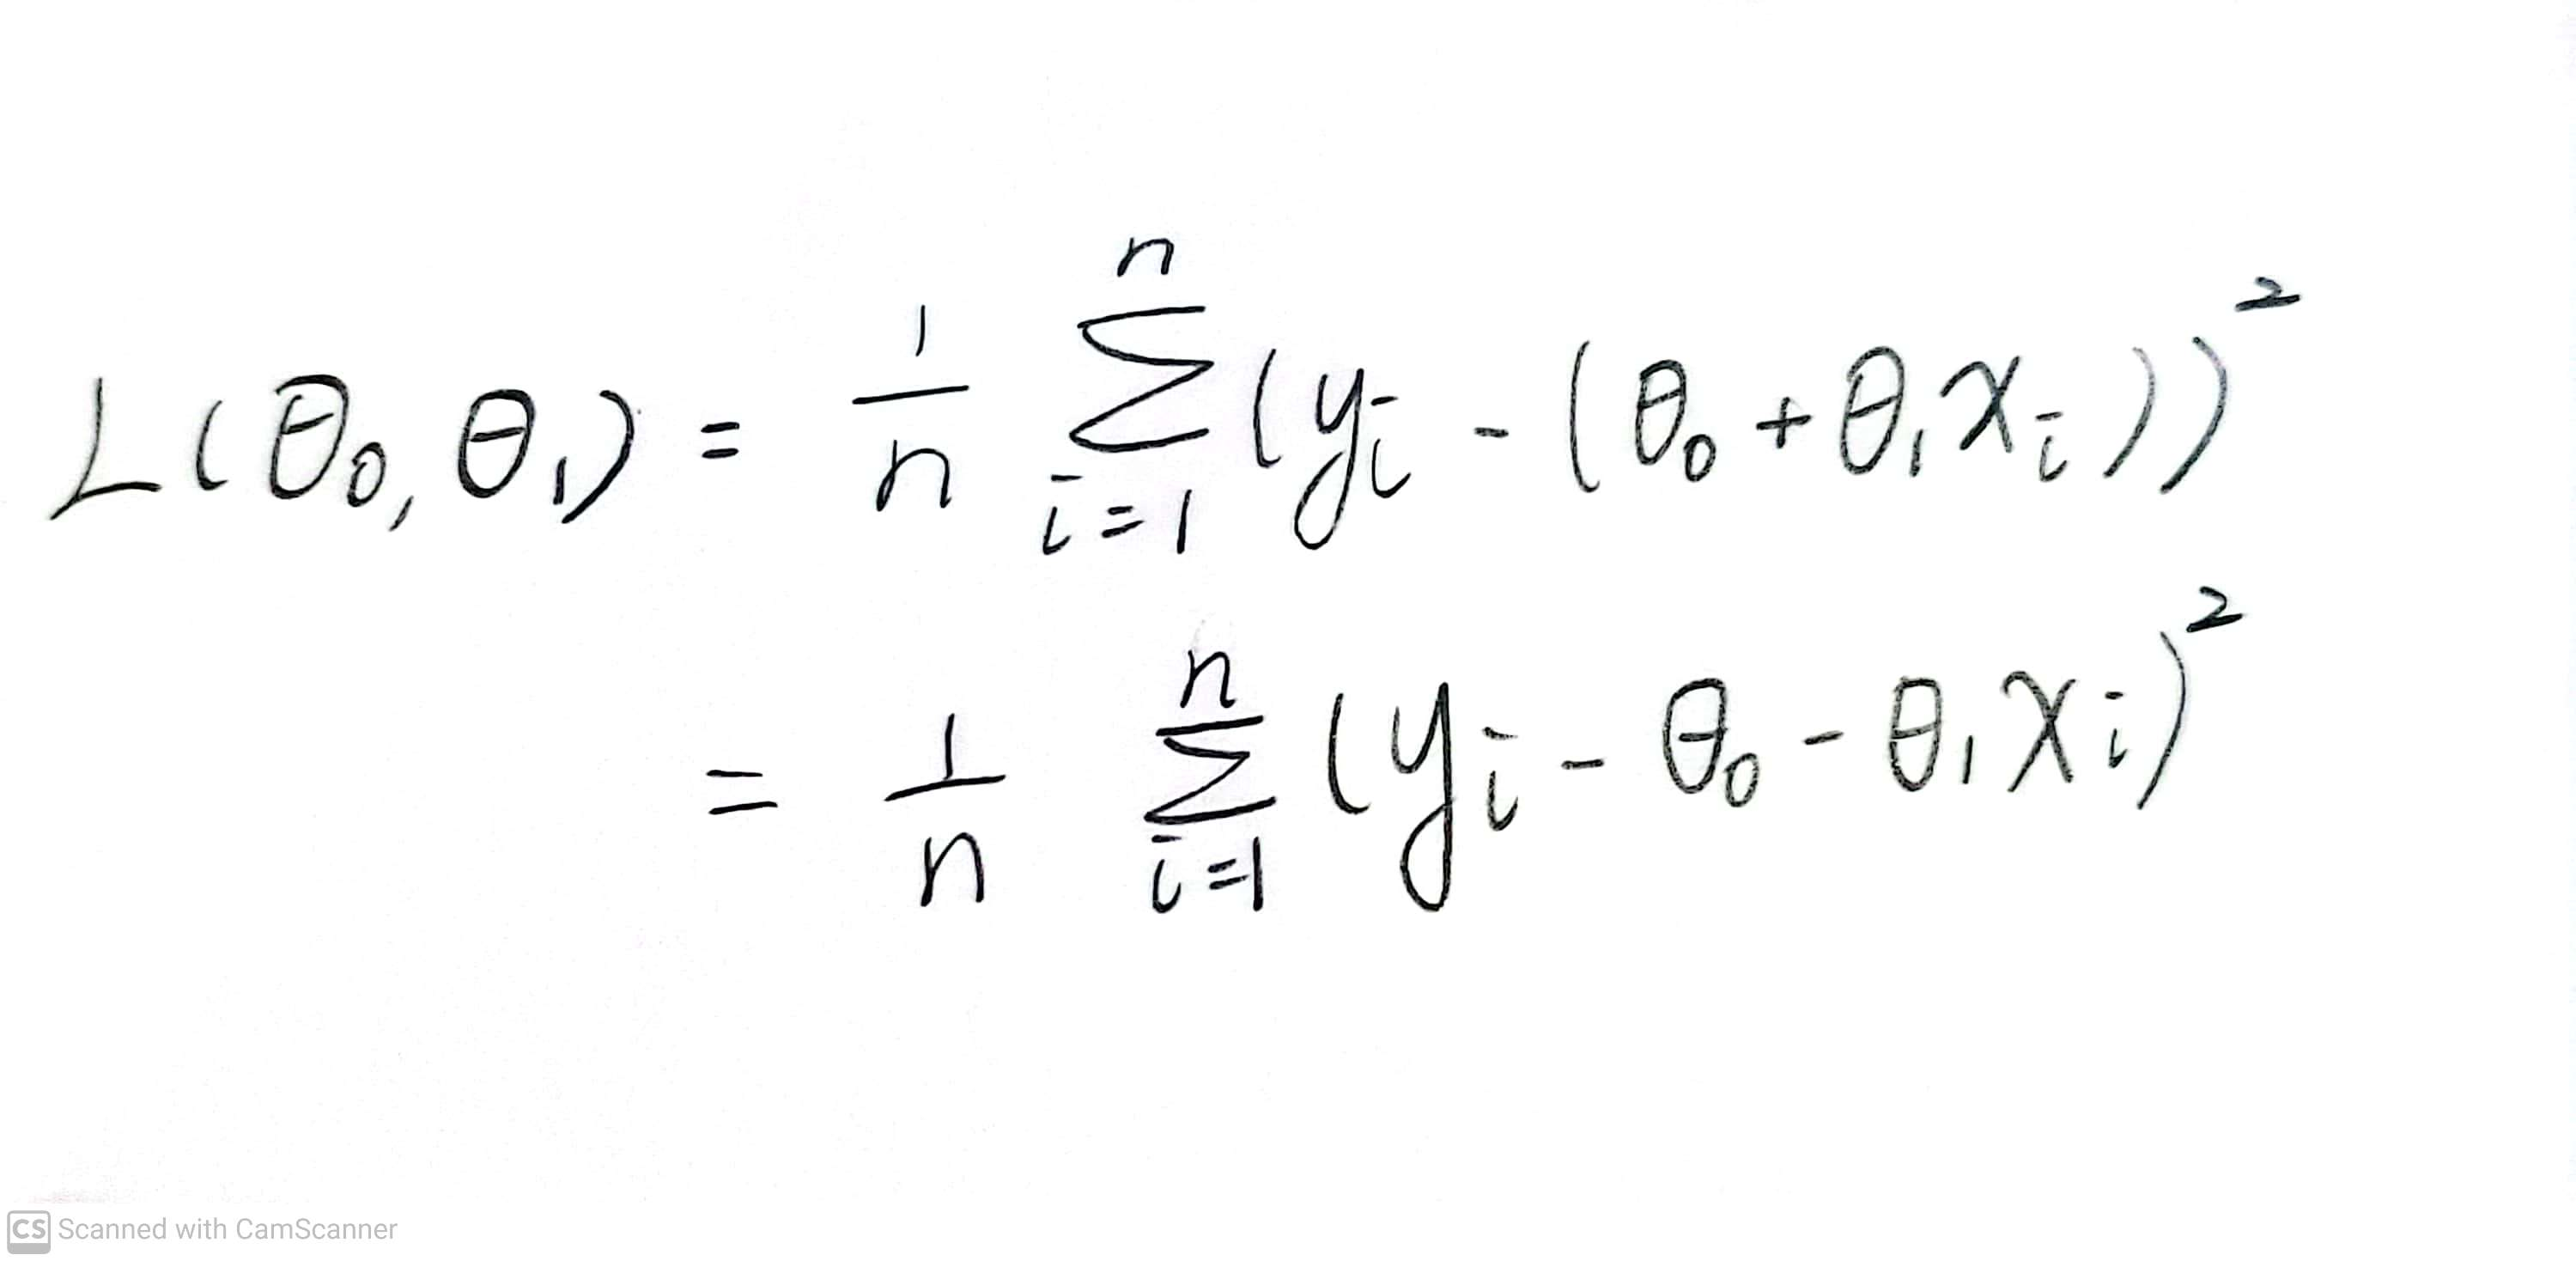

In [21]:
display(Image(filename="MSE.jpg"))

In [22]:
def predict(x, theta_0, theta_1):
    ### YOUR CODE STARTS HERE ###
    y_hat = theta_0 + theta_1*x
    ### YOUR CODE ENDS HERE ###
    return y_hat

def MSE(x, y, theta_0, theta_1):
    '''
    x:       [# data points], feature values
    y:       [# data points], target values
    theta_0: the bias parameter of linear model
    theta_1: the slope parameter of linear model
    '''
    ### YOUR CODE STARTS HERE ###
    prediction = predict(x, theta_0, theta_1)
    sum_squared_error = np.sum((y-prediction)**2)
    mse = sum_squared_error/len(y)
    ### YOUR CODE ENDS HERE ###

    return mse

In [23]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
print(MSE(x, y, theta_0_random, theta_1_random))

4.925813195380588


In [24]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
def plot_MSE_contour(x, y):  # Produces a contour plot of the loss landscape
    fig, axes = plt.subplots()

    Theta_0, Theta_1 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))

    bs_map = []
    for theta_0, theta_1 in zip(Theta_0.ravel(), Theta_1.ravel()):
        bs_map.append(MSE(x, y, theta_0, theta_1))

    bs_map = np.asarray(bs_map).reshape(100, 100)

    axes.set_xlabel('theta_0', fontsize=14)
    axes.set_ylabel('theta_1', fontsize=14)
    axes.set_title('MSE', fontsize=18)

    im = axes.contour(Theta_0, Theta_1, bs_map, 100)
    fig.colorbar(im, ax=axes)

    return fig, axes

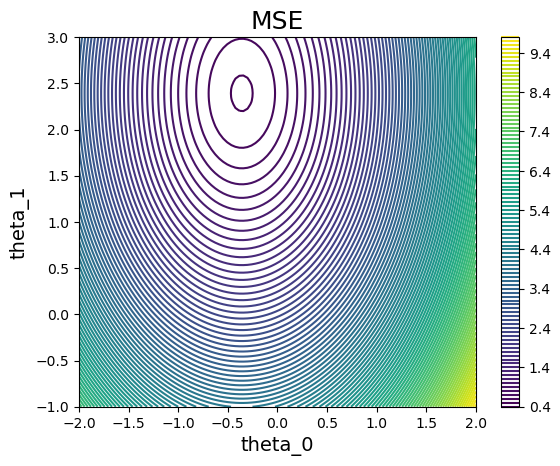

In [25]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
fig, axes = plot_MSE_contour(x, y)

### Problem 2.3 (10 points): Compute the gradient of MSE

- Write out the gradient of MSE with respect to $\theta_0$ and $\theta_1$, i.e., $\frac{\partial}{\partial \theta_0} L(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} L(\theta_0, \theta_1)$. You can use the same typesetting methods as in problem 2.2.
- Implement the function `gradient_mse` that computes the gradient of MSE. This function should output a tuple, where the first value is the gradient with respect to $\theta_0$, and the second values is the gradient with respect to $\theta_1$.

([Here](https://tutorial.math.lamar.edu/classes/calciii/partialderivatives.aspx) is one of many online resources in case you need a refresher on partial derivatives.)

Write what the gradient of MSE is here:

## the gradient of MSE with respect to theta_0

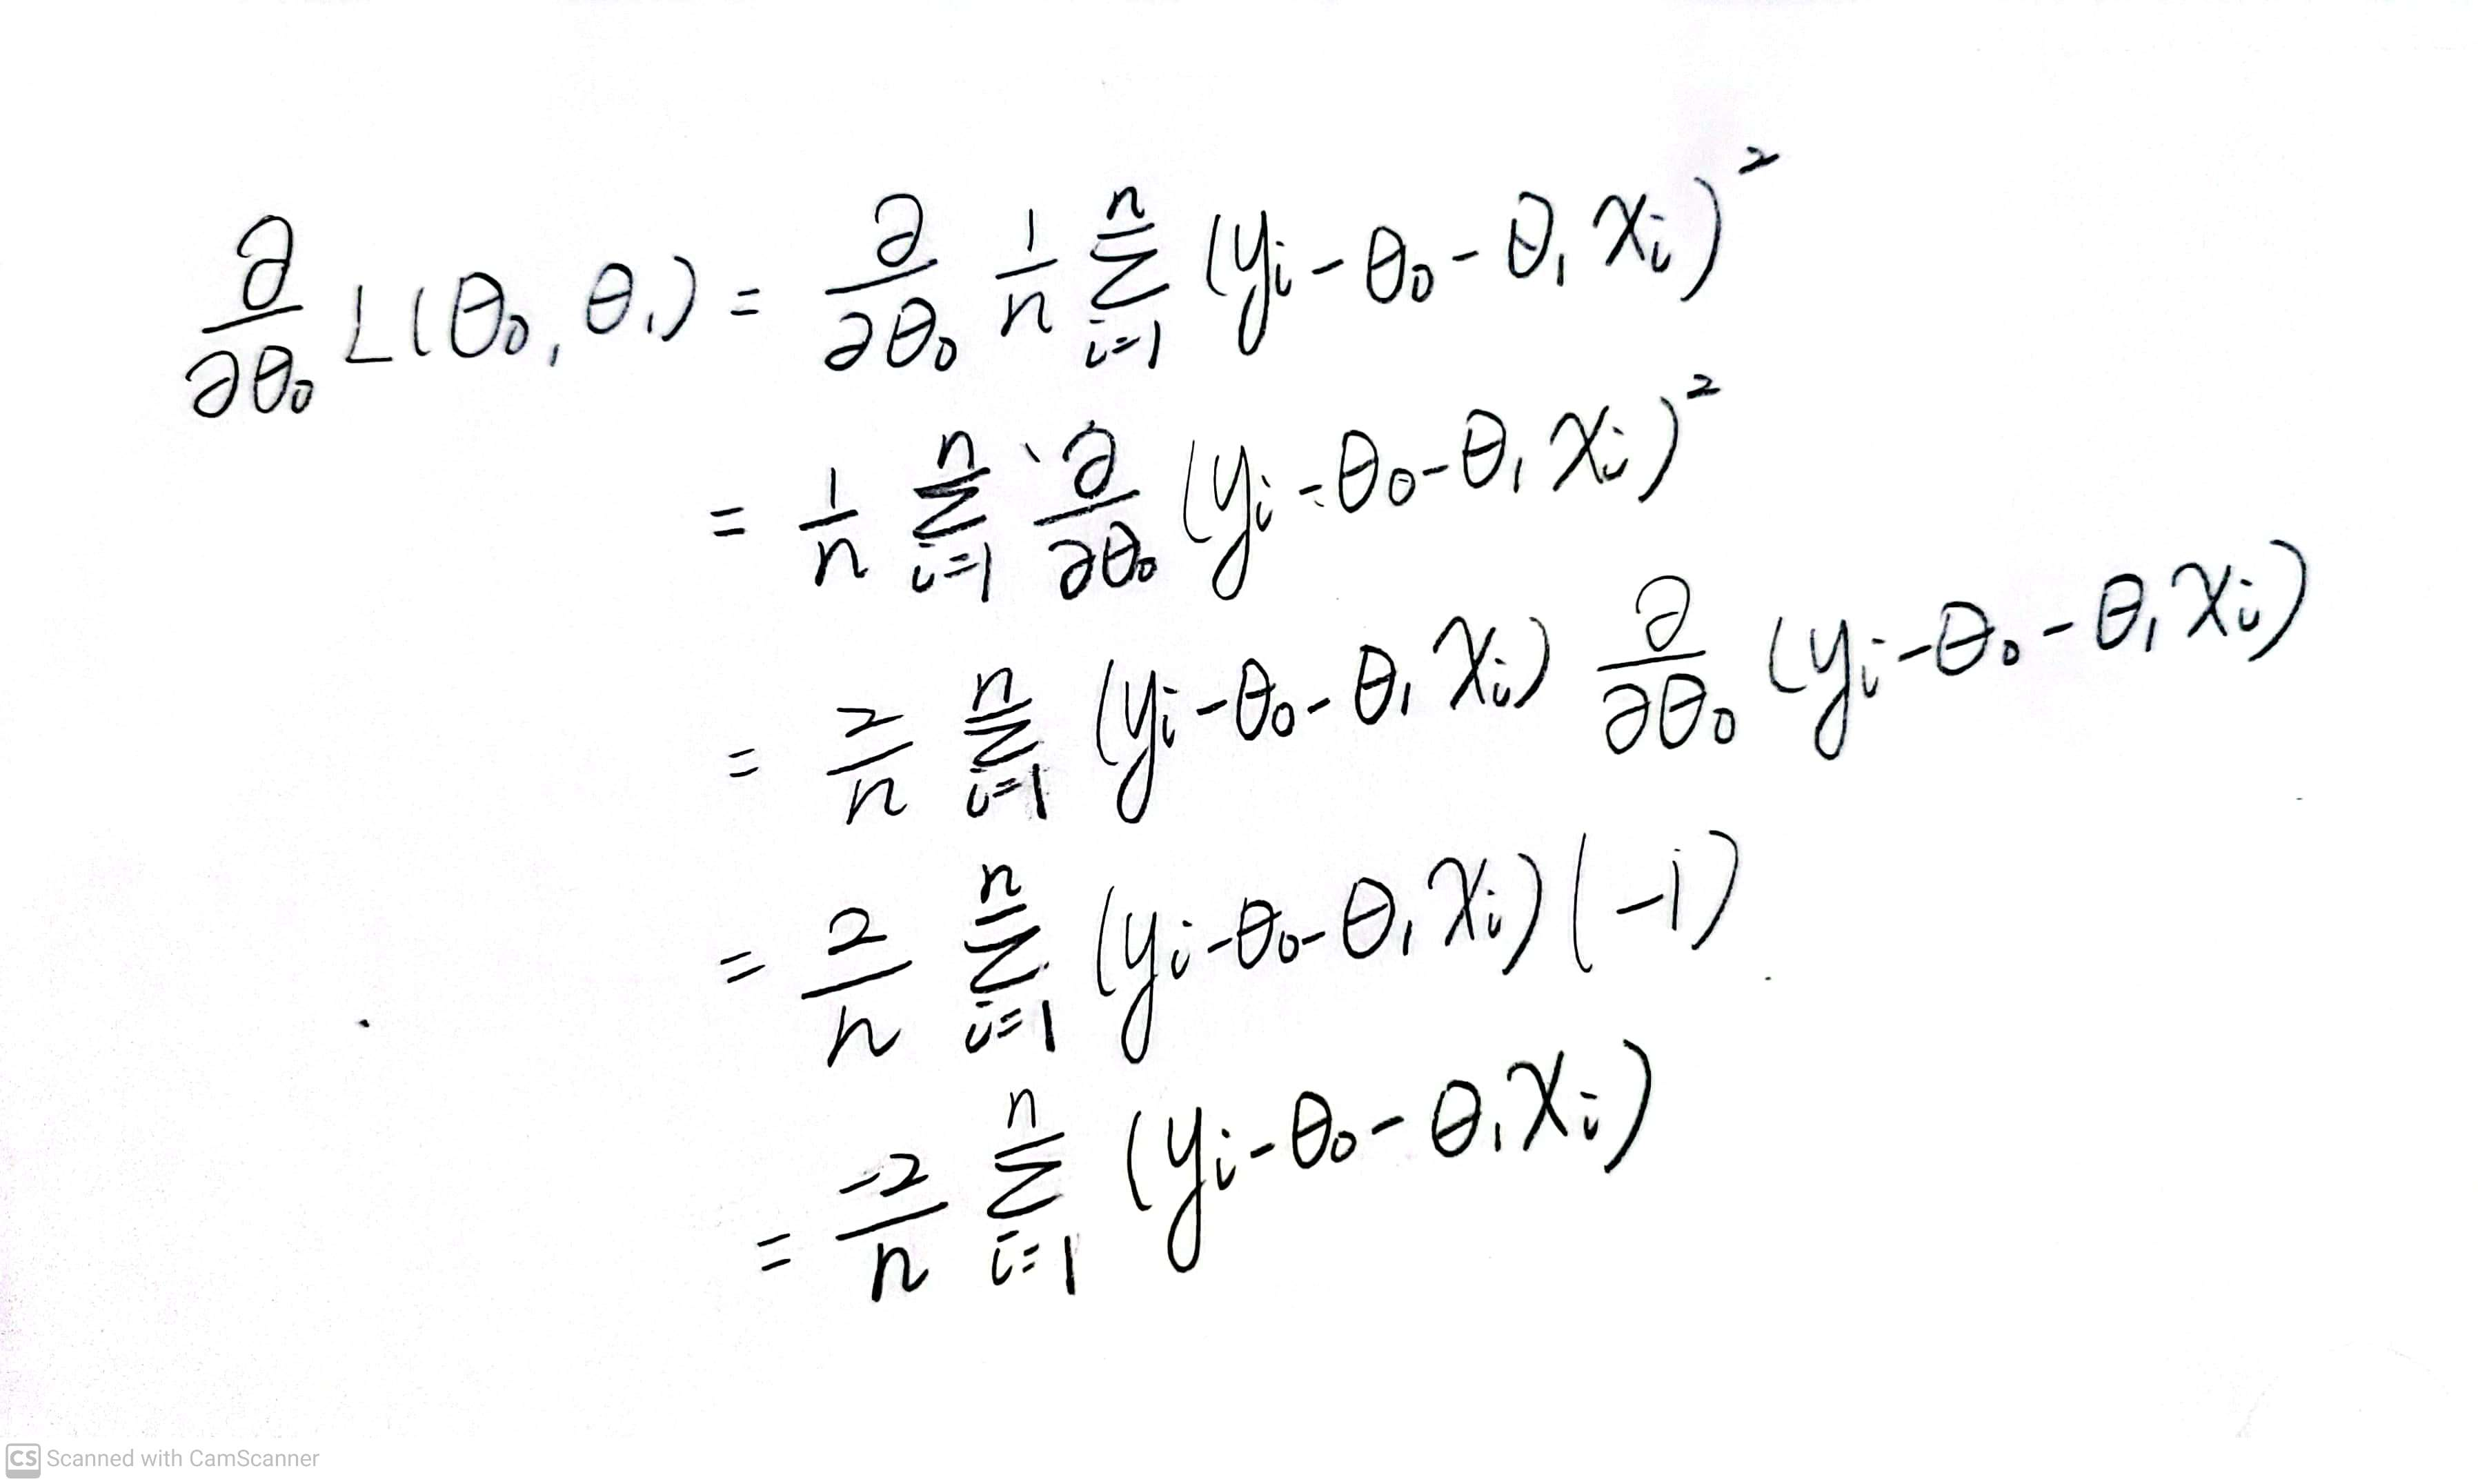

In [26]:
display(Image(filename="theta0.jpg"))

## the gradient of MSE with respect to theta_1

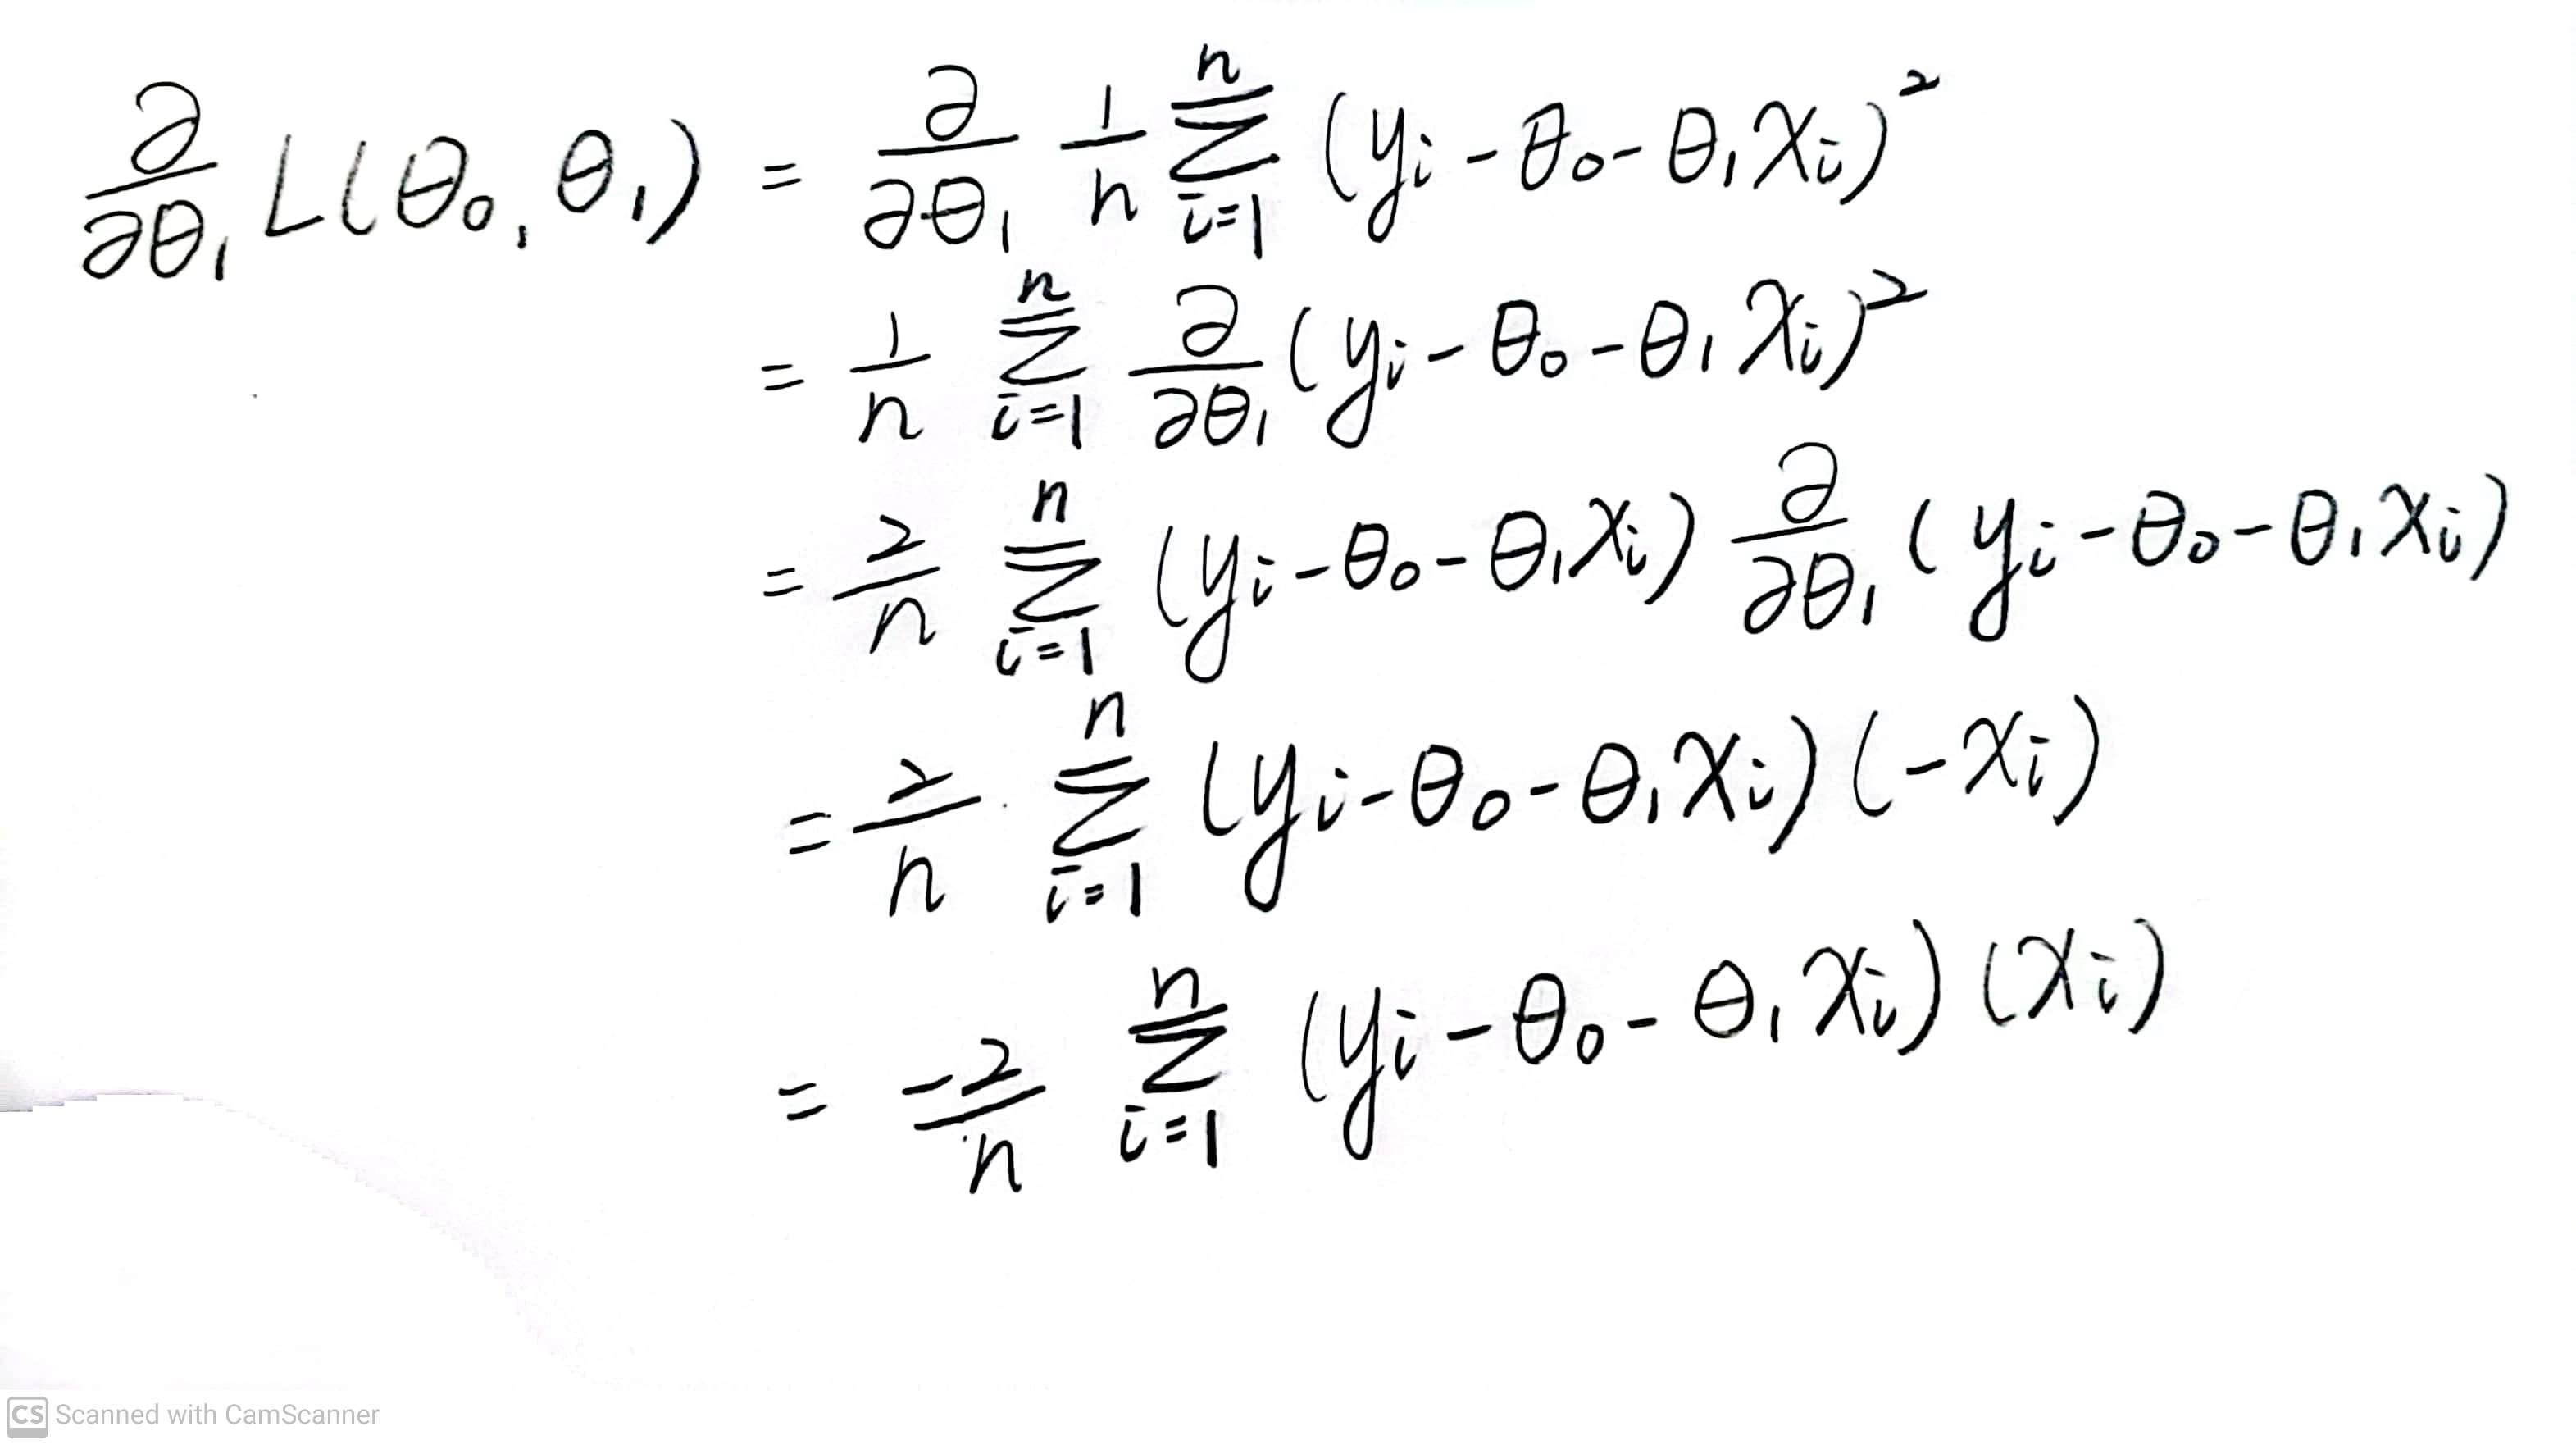

In [27]:
display(Image(filename="theta1.jpg"))

In [28]:
def gradient_mse(x, y, theta_0, theta_1):
    ### YOUR CODE STARTS HERE ###
    n=len(y)
    prediction=predict(x, theta_0, theta_1)
    error = y-prediction
    grad_0 = (-2/n)*np.sum(error)
    grad_1 = (-2/n)*np.sum(error*x)
    ### YOUR CODE ENDS HERE

    return grad_0, grad_1  # grad_0 is dL/dtheta_0, grad_1 is dL/dtheta_1

In [29]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
grad_0, grad_1 = gradient_mse(x, y, 0.5, -1.0)
print(grad_0, grad_1)
# We use math.isclose instead of == due to potential floating point precision errors
assert math.isclose(grad_0, 1.7177774269022454)
assert math.isclose(grad_1, -2.181717782869463)

1.7177774269022454 -2.181717782869463


### Problem 2.4 (10 points): Gradient Descent Algorithm
We now have all the prerequisites to implement the gradient descent algorithm. Recall that in gradient descent, we find the gradient (vector pointing towards greatest positive change) of our loss, then increment the parameters by a small amount in the opposite direction of the gradient so that the new parameters have a smaller loss value.

Your task for this problem is two-fold:
1. Implement the function `gradient_descent`, which takes in:
      - the input and output data `x` and `y`,
      - the initial values for parameters `theta_0_init` and `theta_1_init`,
      - the learning rate `lr` that controls the size of steps taken,
      - the number of iterations to execute `max_iters`,
      - and finally a flag `display_boundary` that plots intermittent regression plots while training every 20 iterations if it is `True`.
      
   This function should keep track of all the intermittent values of `theta_0`, `theta_1` and `mse` during training and return all of them at the end in 3 separate lists: `theta_0s`, `theta_1s`, and `mses`. To be clear, the first entry in these lists correspond to the initial settings (i.e., `theta_0s[0] == theta_0_init`) and the last entry corresponds to the final, trained values.
2. Train a model using `gradient_descent` and then, using the outputted `mses` create a plot of MSE vs training iteration, to see if the model converges.

In [30]:
def gradient_descent(x, y, theta_0_init, theta_1_init, lr=0.001, max_iters=100, display_boundary=False):
    ### YOUR CODE STARTS HERE ###
    theta_0s = [theta_0_init]
    theta_1s = [theta_1_init]
    mse = MSE(x, y, theta_0_init, theta_1_init)
    mses = [mse]
    #Compute the gradient at the current parameter vector
    grad_0, grad_1 = gradient_mse(x, y, theta_0_init, theta_0_init)
    for i in range(max_iters):
        new_theta_0 = theta_0s[i] - lr*grad_0
        new_theta_1 = theta_1s[i] - lr*grad_1
        theta_0s.append(new_theta_0)
        theta_1s.append(new_theta_1)
        mse = MSE(x, y, new_theta_0, new_theta_1)
        mses.append(mse)
        grad_0, grad_1 = gradient_mse(x, y, new_theta_0, new_theta_1)
        #plots intermittent regression plots while training every 20 iterations if it is True
        if display_boundary and (i+1) % 20 == 0:
            plot_regression(x, y, new_theta_0, new_theta_1)
            
    return theta_0s, theta_1s, mses  # lists of values of theta_0, theta_1, and mse during each iteration while training

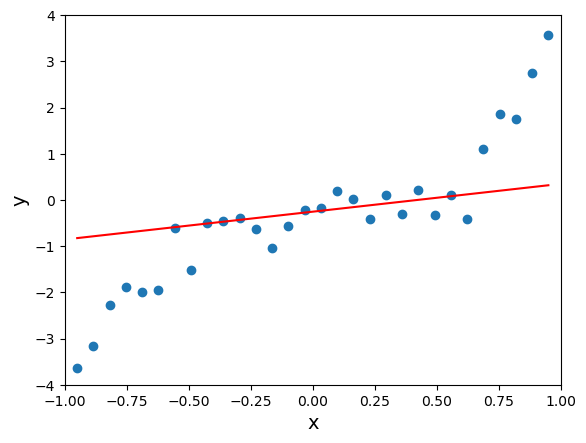

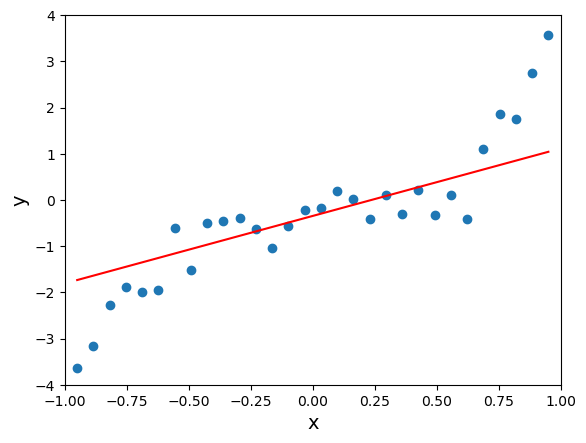

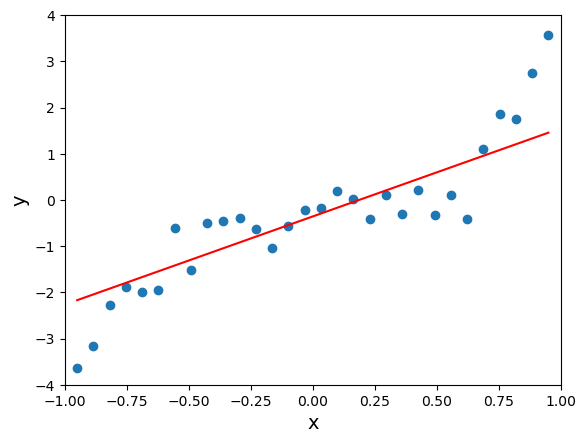

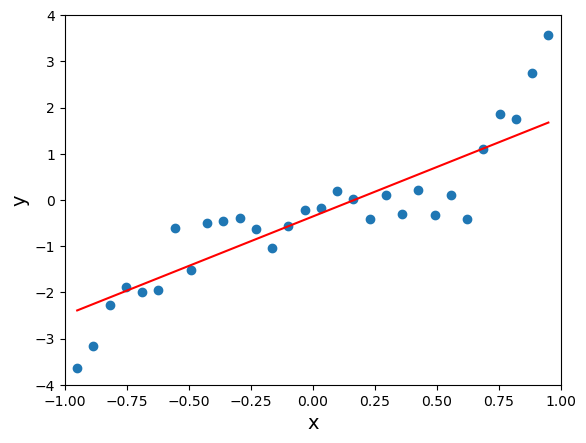

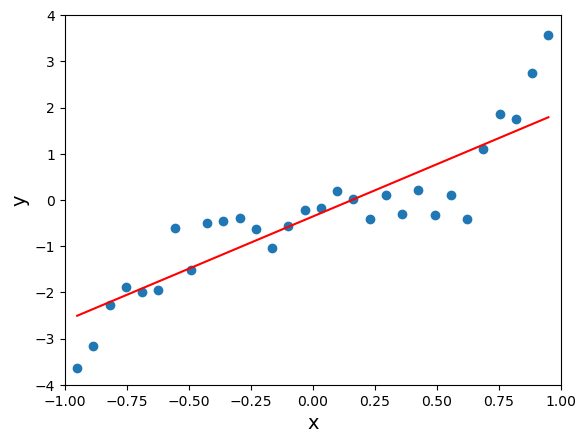

In [31]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
theta_1s, theta_2s, mses = gradient_descent(x, y, theta_0_random, theta_1_random,
                                          lr=0.05, max_iters=100, display_boundary=True)

Text(0, 0.5, 'MSE')

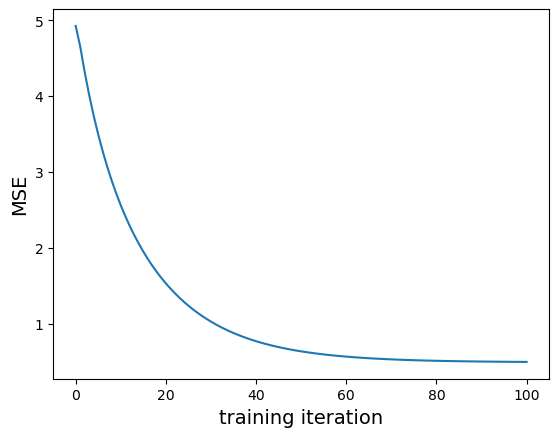

In [32]:
### YOUR CODE STARTS HERE ###
# Create a plot of MSE vs training iteration
plt.plot(mses)
plt.xlabel('training iteration', fontsize=14)
plt.ylabel('MSE', fontsize=14)

---
## Problem 3: Model Selection

As was seen in the previous problem, a linear model can fit the given data; however, it is far from perfect. It turns out that it is fairly straightforward to adapt a linear model into providing non-linear responses. This is achieved by adding additional inputs that are polynomial transformations of other inputs. For a $p$-degree polynomial, this looks like this:
$$f(x|\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_p x^p$$

This practice is often referred to as polynomial regression. An important aspect of polynomial regression is that the polynomial degree, $p$, is completely up to us to choose. This is a modeling design decision that must be chosen prior to fitting any data. We call values such as these _hyperparameters_. It may be tempting to just select a very large value for $p$, but this has a good chance of leading to a model that overfits on the given data and does not generalize well outside of the training data.

One simple way to select a particular degree (or hyperparameter in general) is to try out multiple different values, and then choose the one that yields the best performance on some held-out set of data. We will refer to this data as the validation set.

Let's first load in the validation dataset by running the code cell below:

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

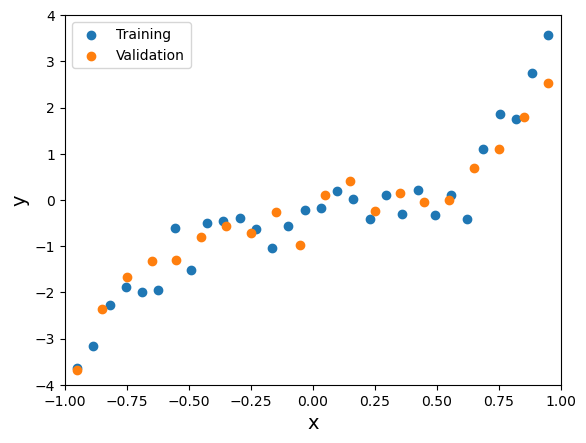

In [33]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
valid_x, valid_y = gen_data(20, seed=seed-1)  # Use a different seed to get different data than the training split.

def plot_data(x, y, valid_x=valid_x, valid_y=valid_y):
    # Make a figure with 1 subplot
    fig, axes = plt.subplots()

    axes.scatter(x, y, label='Training')
    if valid_x is not None:
        axes.scatter(valid_x, valid_y, label="Validation")
        axes.legend()

    axes.set_xlabel('x', fontsize=14)
    axes.set_ylabel('y', fontsize=14)

    axes.set_xlim(-1.0,1.0)
    axes.set_ylim(-4,4)

    return fig, axes

plot_data(x, y, valid_x, valid_y)

### Problem 3.1 (5 points): Transform Input Features

Just like in problem 2, we will be using the numpy arrays `x` and `y` for 1D feature and target values. What is different now is that we would like to use a polynomial regression model $f(x|\theta) = \theta_0 + \theta_1 x + \dots + \theta_p x^p$ where $p$ is the polynomial degree and is known beforehand. To do so, we must first write the function `transform_inputs` that takes in all the values of `x` (with length $n$) that we want to have predictions for and transform them into a $n\times p$ matrix `X` where each column corresponds to a power of `x`, like so:
$$
X=\begin{bmatrix}
\vert & \vert &  & \vert \\
x & x^2 & \dots & x^p \\
\vert & \vert & & \vert
\end{bmatrix}
$$

Feel free to import and use `PolynomialFeatures` from `sklearn.prepocessing` to help.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

def transform_inputs(x, p):
    ### YOUR CODE STARTS HERE ###
    poly = PolynomialFeatures(p, include_bias=False)
    x =x.reshape(-1,1)
    X = poly.fit_transform(x)
    ### YOUR CODE ENDS HERE
    return X  # resulting matrix where each column is equal to x^i for i=1,...,p

In [35]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
transform_inputs(np.array([0, 0.5, 1, 2]), 4)

array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.5   ,  0.25  ,  0.125 ,  0.0625],
       [ 1.    ,  1.    ,  1.    ,  1.    ],
       [ 2.    ,  4.    ,  8.    , 16.    ]])

In [36]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
output = transform_inputs(np.array([0.5, 3]), 4)
print(output)
np.isclose(
    output,
    np.array([[0.5, 0.25, 0.125, 0.0625], [3., 9., 27., 81.]])
).all()  # Check if all of the elements match between `transform_inputs` and the expected output

[[5.00e-01 2.50e-01 1.25e-01 6.25e-02]
 [3.00e+00 9.00e+00 2.70e+01 8.10e+01]]


True

### Problem 3.2 (10 points): Fit and Visualize a Polynomial Regression Model
Now that we have appropriately transformed the inputs, we can learn the corresponding polynomial regression model. For this problem, we will be relying on the `LinearRegression` class from `sklearn.linear_model` rather than implementing our own fitting procedure from scratch.

- Write the function `fit_poly` that takes in 1D arrays `x` and `y`, as well as a desired degree `p`, and returns a fit `LinearRegression` model.
- Write the function `plot_poly_regression` that takes in the training data, validation data, and a fit model and plots a visualization of the predicted mean values from the model over the range of input data.
- Execute these functions to visualize what a cubic ($p=3$) regression model fit to the training data `x` and `y` looks like.

In [37]:
def fit_poly(x, y, p):
    ### YOUR CODE STARTS HERE ###
    X = transform_inputs(x, p)
    model = LinearRegression().fit(X, y)
    ### YOUR CODE ENDS HERE ###
    return model  # A fit LinearRegression object

In [38]:
def plot_poly_regression(train_x, train_y, valid_x, valid_y, model, p):
    '''
    train_x:       [# feature vectors], training feature values
    train_y:       [# feature vectors], training target values
    valid_x:       [# feature vectors], validation feature values
    valid_y:       [# feature vectors], validation target values
    model:         LinearRegression object
    '''

    ### YOUR CODE STARTS HERE
    fig, axes = plot_data(train_x, train_y, valid_x, valid_y)
    trans_valid = transform_inputs(valid_x, p)
    y_pred = model.predict(trans_valid)
    axes.plot(valid_x, y_pred, label="Polynomial Regression Model")
    axes.legend()
    ### YOUR CODE ENDS HERE

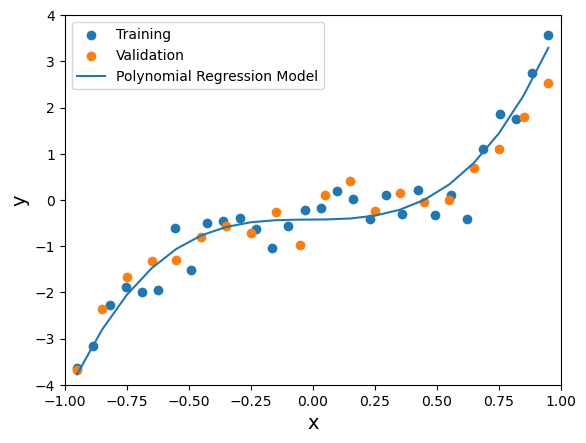

In [39]:
# JUST RUN - DO NOT EDIT THIS CODE BLOCK
cubic_model = fit_poly(x, y, p=3)
plot_poly_regression(x, y, valid_x, valid_y, cubic_model, p=3)

### Problem 3.3 (15 points): Polynomial Degree Selection

- Choose a value $p$ such that the associated model **underfits** the data. Demonstrate this with a plot.
- Choose a value $p$ such that the associated model **overfits** the data. Demonstrate this with a plot.
- Using the validation set, find the optimal value of $p$ that leads to the lowest MSE. Consider values of $p$ from $p=1$ up to $p=20$. Report the lowest held-out MSE score, the associated degree $p$, and plot the resulting model fit.  

## Underfit
When p = 1, it makes the associated model underfits the data

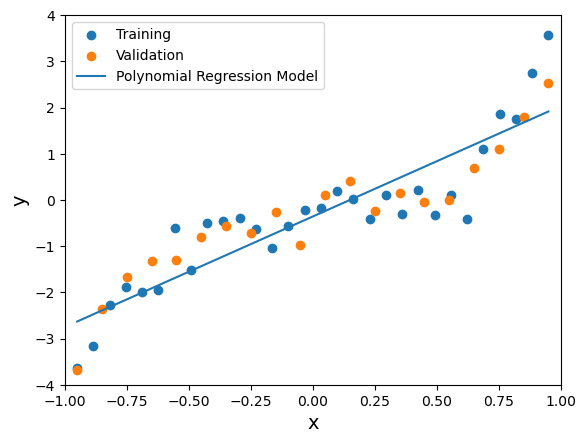

In [40]:
cubic_model = fit_poly(x, y, p=1)
plot_poly_regression(x, y, valid_x, valid_y, cubic_model, p=1)

## Overfit
When p=25, the associated model overfits the data.

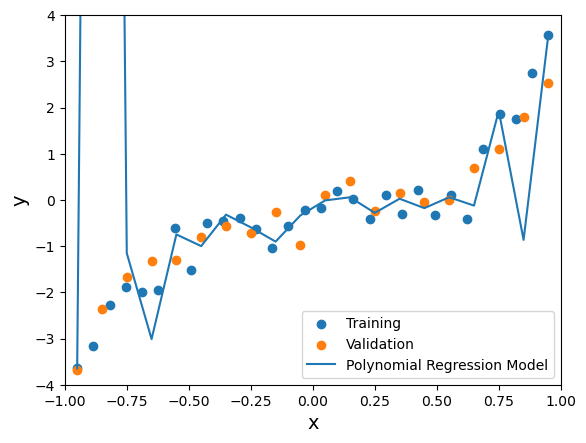

In [41]:
cubic_model = fit_poly(x, y, p=25)
plot_poly_regression(x, y, valid_x, valid_y, cubic_model, p=25)

lowest held-out MSE score is: 0.1383214302704861 with the associated degree 𝑝= 11


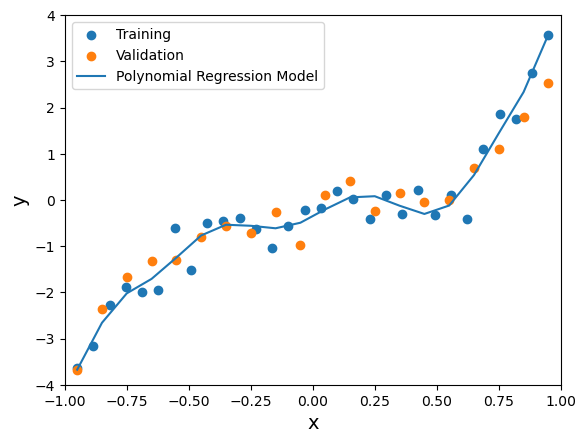

In [45]:
mses=[]
for i in range(1,21):
    model = fit_poly(x, y, i)
    trans_valid = transform_inputs(valid_x, i)
    pred_y = model.predict(trans_valid)
    sum_squared_error = np.sum((valid_y-pred_y)**2)
    mse = sum_squared_error/len(valid_y)
    mses.append(mse);
best_p = np.argmin(mses)+1
print(f'lowest held-out MSE score is: {np.min(mses)} with the associated degree 𝑝= {best_p}')
model = fit_poly(x, y, p=best_p)
plot_poly_regression(x, y, valid_x, valid_y, model, p=best_p)

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. If you did not collaborate you can simply write N/A.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using Piazza) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your
collaboration.

In [ ]:
N/A